# Exploratory Data Analysis

## Import data

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from neuralNetwork import NeuralNetwork

In [14]:
data = np.loadtxt('mlp_train.txt')
df = pd.DataFrame(data).rename(columns={0:'x1',1:'x2',2:'y'})
df.head()

,x1,x2,y
0,0.459861,-2.196528,-0.991458
1,-0.740200,0.780350,0.333378
2,0.555866,-0.750616,-0.743051
3,0.747876,0.184974,2.320633
4,-1.028215,0.780350,1.244204


## Analyzing Data

In [15]:
df.describe()

,x1,x2,y
count,1771.000000,1771.000000,1771.000000
mean,0.000084,-0.008521,0.001141
std,0.994831,1.006813,1.011010
min,-2.132271,-2.366636,-0.991458
25%,-0.788203,-0.665562,-0.743051
50%,0.171846,0.184974,-0.411842
75%,0.795878,0.780350,0.581785
max,1.515915,1.545833,3.811075


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1771 non-null   float64
 1   x2      1771 non-null   float64
 2   y       1771 non-null   float64
dtypes: float64(3)
memory usage: 41.6 KB


## Plotting data

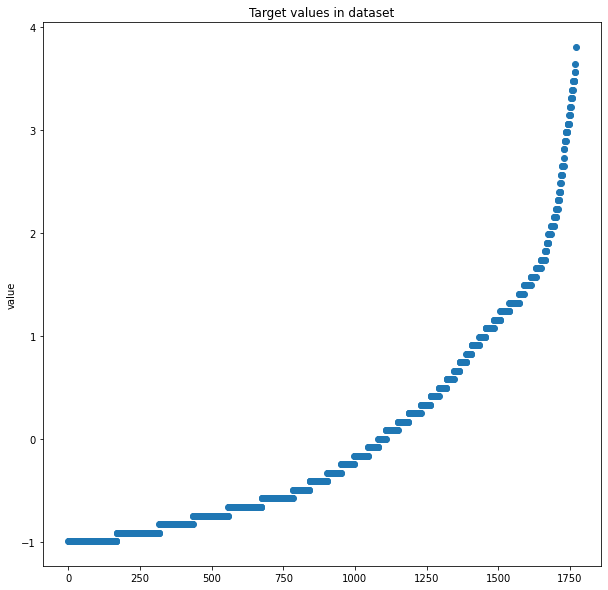

In [17]:
plt.figure(figsize=(10,10))
plt.title('Target values in dataset')
plt.ylabel('value')
plt.scatter(df.index,df['y'].sort_values())
plt.show()

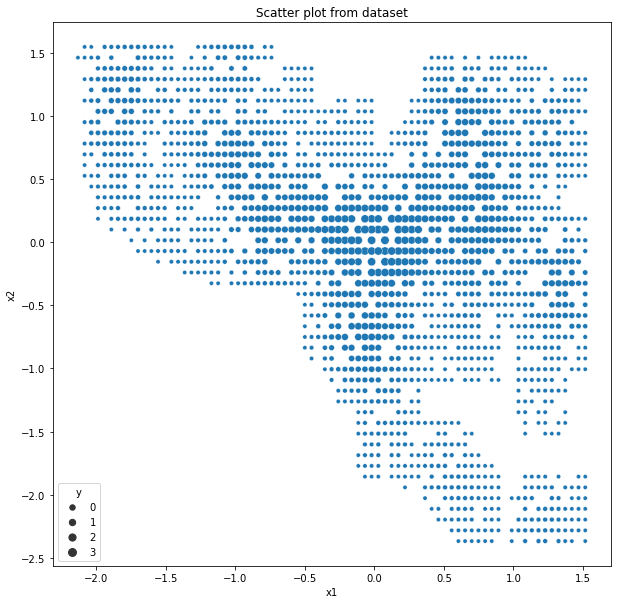

In [18]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title('Scatter plot from dataset')
sns.scatterplot(data=df,x='x1',y='x2',size='y',ax=ax)
plt.show()

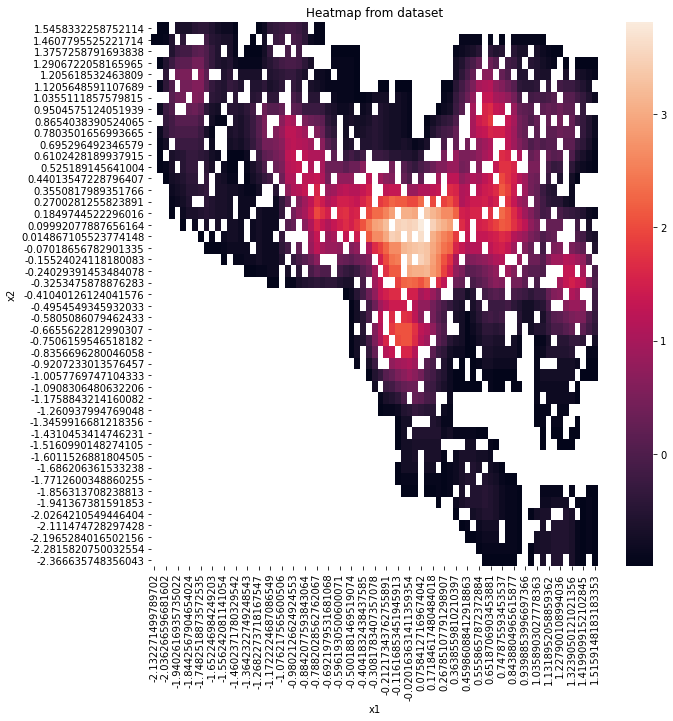

In [19]:
fig,ax = plt.subplots(figsize=(10,10))
df_hm = df.pivot('x2','x1','y')
df_hm = df_hm.sort_index(axis=0,ascending=False)
ax.set_title('Heatmap from dataset')
sns.heatmap(df_hm,ax=ax)
plt.show()

# Creating model

In [20]:
X = df[['x1','x2']].to_numpy()
y = df['y'].to_numpy()
print(X.shape)
print(y.shape)

(1771, 2)
(1771,)


In [21]:
model = NeuralNetwork(num_layers=4,num_perceptrons=[2,5,3,1])

In [22]:
model.predict(X)

array([[0.75396564],
       [0.77375267],
       [0.77067743],
       ...,
       [0.76747762],
       [0.7849004 ],
       [0.76308399]])

In [23]:
E = 0
d = model.predict(X)
d = d.reshape(d.shape[0])
print(d)
for i in range(d.shape[0]):
    E+= model.calculate_error(d[i],y[i])
print(E)

[0.75396564 0.77375267 0.77067743 ... 0.76747762 0.7849004  0.76308399]
1425.9630682802665


In [24]:
err = model.fit(X,y,100)

Epoch 10, E = 1.0096418549977597, accuracy = 0
Epoch 20, E = 1.0096419386505906, accuracy = 0
Epoch 30, E = 0.6256093311852712, accuracy = 0
Epoch 40, E = 0.6341457792755706, accuracy = 0
Epoch 50, E = 0.6346483002156724, accuracy = 0
Epoch 60, E = 0.6348296409497135, accuracy = 0
Epoch 70, E = 0.634921602394517, accuracy = 0
Epoch 80, E = 0.6349771290179818, accuracy = 0
Epoch 90, E = 0.635013714541168, accuracy = 0
Epoch 100, E = 0.6350392599190483, accuracy = 0
